<a href="https://colab.research.google.com/github/Swindl3/python_colab/blob/master/Stock_Predict_with_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install requests_html
!pip install yahoo_fin
!pip install parinya
!pip install quandl

In [0]:
import numpy as np 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import parinya.stock as stk
import quandl

In [48]:
df = stk.getHistStock("CPALL.BK",day_begin='01-01-2014',day_end='31-12-2019')
print(df)

             Open   High    Low  Close  Adj Close      Volume
Date                                                         
2014-01-02  41.75  42.50  39.50  40.00  35.576023  25791700.0
2014-01-03  39.50  40.00  39.00  40.00  35.576023  20419000.0
2014-01-06  40.00  40.50  39.00  40.25  35.798367  12869600.0
2014-01-07  40.50  41.25  40.00  41.00  36.465420  10010600.0
2014-01-08  41.00  41.25  40.25  40.50  36.020721  14810300.0
...           ...    ...    ...    ...        ...         ...
2019-12-23  75.00  75.75  74.50  74.75  74.750000  22844600.0
2019-12-24  75.50  75.75  74.75  75.00  75.000000   9187100.0
2019-12-25  75.00  75.25  74.50  74.75  74.750000   4028400.0
2019-12-26  75.00  75.25  74.50  75.00  75.000000   6023500.0
2019-12-27  75.25  76.00  74.00  74.50  74.500000  17501000.0

[1463 rows x 6 columns]


In [49]:
df = df[['Adj Close','Open']]
print(df.head())

            Adj Close   Open
Date                        
2014-01-02  35.576023  41.75
2014-01-03  35.576023  39.50
2014-01-06  35.798367  40.00
2014-01-07  36.465420  40.50
2014-01-08  36.020721  41.00


In [50]:

forecast_out = 30

df['Prediction'] = df['Adj Close'].shift(-forecast_out)

print(df.tail())

            Adj Close   Open  Prediction
Date                                    
2019-12-23      74.75  75.00         NaN
2019-12-24      75.00  75.50         NaN
2019-12-25      74.75  75.00         NaN
2019-12-26      75.00  75.00         NaN
2019-12-27      74.50  75.25         NaN


In [51]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last 'n' rows
X = X[:-forecast_out]
print(X)

[[35.576023 41.75    ]
 [35.576023 39.5     ]
 [35.798367 40.      ]
 ...
 [79.       78.25    ]
 [80.       79.25    ]
 [79.       80.      ]]


In [52]:

### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array (All of the values including the NaN's)
y = np.array(df['Prediction'])
# Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
print(y)

[34.241917 35.353672 34.90897  ... 74.75     75.       74.5     ]


In [0]:

# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [55]:

# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9606574973305421


In [56]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[78.75 78.75]
 [77.75 79.25]
 [76.5  77.5 ]
 [76.75 76.75]
 [75.5  76.25]
 [75.5  75.5 ]
 [75.25 76.  ]
 [76.5  75.25]
 [76.5  77.  ]
 [76.5  77.  ]
 [75.75 76.75]
 [76.   75.5 ]
 [75.   76.  ]
 [75.25 74.25]
 [75.25 75.  ]
 [75.   75.25]
 [73.25 75.  ]
 [73.5  73.5 ]
 [73.25 74.  ]
 [73.25 73.75]
 [72.5  73.5 ]
 [73.5  73.  ]
 [73.75 74.25]
 [73.5  73.5 ]
 [75.   73.5 ]
 [74.75 75.  ]
 [75.   75.5 ]
 [74.75 75.  ]
 [75.   75.  ]
 [74.5  75.25]]


In [57]:
# Print support vector regressor model predictions for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[74.34126782 74.29692996 77.36807724 84.80685126 76.73178262 78.43482714
 74.76220227 85.31993312 81.50393967 81.50393967 77.30341549 83.85628341
 72.60247967 77.17757274 76.4132518  74.22040925 75.76092569 78.81092787
 76.84367281 77.34985726 75.1495478  80.65727683 76.35589542 78.81092787
 79.93931847 73.59470192 73.68291885 73.59470192 74.76081959 72.21619494]


Date
2020-01-02    71.00
2020-01-03    71.75
2020-01-06    71.25
2020-01-07    72.25
2020-01-08    72.50
2020-01-09    74.00
2020-01-10    74.25
2020-01-13    71.75
2020-01-14    73.00
2020-01-15    71.75
2020-01-16    74.25
2020-01-17    74.25
2020-01-20    75.00
2020-01-21    75.25
2020-01-22    74.75
2020-01-23    75.50
2020-01-24    73.50
2020-01-27    71.50
2020-01-28    71.25
2020-01-29    72.00
2020-01-30    71.75
2020-01-31    70.75
Name: Adj Close, dtype: float32


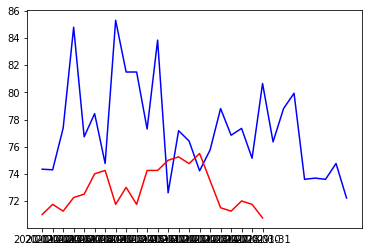

In [58]:
from matplotlib import pyplot as plt
df = stk.getHistStock("CPALL.BK",day_begin='01-01-2020',day_end='31-01-2020')
df = df['Adj Close']
print(df)
plt.plot(svm_prediction,'b')
plt.plot(df,'r')
plt.show()